<a href="https://colab.research.google.com/github/worldstar0722/IS_4482_25FA/blob/main/A3_Choi_Ellie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chunk 1

In [12]:

# Pd,np.matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

plt.rcParams["figure.figsize"] = (10, 6)

# pd.read_csv()
url = "https://raw.githubusercontent.com/matthewpecsok/4482_fall_2024/main/data/CD_additional_balanced.csv"
df = pd.read_csv(url)

# Overall Structure
display(df.head())
display(df.info())
display(df.describe(include="all"))
print("Shape:", df.shape)

# Nulls
df.isnull().sum()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
1,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
2,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
3,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes
4,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9280 entries, 0 to 9279
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9280 non-null   int64  
 1   job             9280 non-null   object 
 2   marital         9280 non-null   object 
 3   education       9280 non-null   object 
 4   default         9280 non-null   object 
 5   housing         9280 non-null   object 
 6   loan            9280 non-null   object 
 7   contact         9280 non-null   object 
 8   month           9280 non-null   object 
 9   day_of_week     9280 non-null   object 
 10  duration        9280 non-null   int64  
 11  campaign        9280 non-null   int64  
 12  pdays           9280 non-null   int64  
 13  previous        9280 non-null   int64  
 14  poutcome        9280 non-null   object 
 15  emp.var.rate    9280 non-null   float64
 16  cons.price.idx  9280 non-null   float64
 17  cons.conf.idx   9280 non-null   f

None

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,9280.000000,9280,9280,9280,9280,9280,9280,9280,9280,9280,...,9280.000000,9280.000000,9280.000000,9280,9280.000000,9280.000000,9280.000000,9280.000000,9280.000000,9280
unique,NaN,12,4,8,2,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,yes
freq,NaN,2517,5338,3007,7824,4951,7688,6672,2533,2000,...,NaN,NaN,NaN,7244,NaN,NaN,NaN,NaN,NaN,4640
mean,40.403448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.333297,887.282435,0.315302,NaN,-0.496272,93.479178,-40.218125,2.960209,5135.306487,NaN
std,12.062030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.334467,313.802415,0.700671,NaN,1.721204,0.634510,5.360642,1.890402,87.105317,NaN
min,17.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,92.893000,-42.700000,1.244000,5076.200000,NaN
50%,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,-0.100000,93.444000,-41.800000,4.021000,5191.000000,NaN
75%,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.959000,5228.100000,NaN


Shape: (9280, 21)


,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


# Chunk 2

In [13]:

# Target variable
target_col = 'y'
y_target = df[target_col]

# Proportions
counts = y_target.value_counts(dropna=False)
props = y_target.value_counts(normalize=True, dropna=False)
display(pd.DataFrame({'count': counts, 'proportion': props}))

,count,proportion
y,,
yes,4640,0.5
no,4640,0.5


If classes are near 50/50, it's balanced; otherwise imbalanced.


# Chunk 3


## Categorical vs Quantitative

-***Categorical***: Non-numeric variables (object/category) such as job, marital, education.

-***Quantitative***: Numeric variables (int/float) such as age, balance, campaign.



In [14]:

# Identify categorical/quantitative
cat_cols = [c for c in df.columns if df[c].dtype == 'object' and c != target_col]
num_cols = [c for c in df.columns if c not in cat_cols + [target_col]]
print("Categorical predictors (inferred):", cat_cols)
print("Quantitative predictors:", num_cols)

# Distributions of categorical predictors
for c in cat_cols:
    print(f"\nValue counts for {c}:")
    display(df[c].value_counts(dropna=False))

# Convert to category (including target if object)
for c in cat_cols + [target_col]:
    if df[c].dtype == 'object':
        df[c] = df[c].astype('category')

# Check dtypes
df.dtypes


Categorical predictors (inferred): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Quantitative predictors: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Value counts for job:


,count
job,
admin.,2517
blue-collar,1769
technician,1459
services,773
management,651
retired,595
student,358
entrepreneur,308
self-employed,306



Value counts for marital:


,count
marital,
married,5338
single,2900
divorced,1021
unknown,21



Value counts for education:


,count
education,
university.degree,3007
high.school,2102
professional.course,1190
basic.9y,1177
basic.4y,895
basic.6y,458
unknown,445
illiterate,6



Value counts for default:


,count
default,
no,7824
unknown,1456



Value counts for housing:


,count
housing,
yes,4951
no,4104
unknown,225



Value counts for loan:


,count
loan,
no,7688
yes,1367
unknown,225



Value counts for contact:


,count
contact,
cellular,6672
telephone,2608



Value counts for month:


,count
month,
may,2533
jul,1477
aug,1353
jun,1169
nov,886
apr,785
oct,369
mar,313
sep,295



Value counts for day_of_week:


,count
day_of_week,
thu,2000
wed,1861
mon,1846
tue,1810
fri,1763



Value counts for poutcome:


,count
poutcome,
nonexistent,7244
failure,1074
success,962


,0
age,int64
job,category
marital,category
education,category
default,category
housing,category
loan,category
contact,category
month,category
day_of_week,category


In [15]:

# One-hot encode predictors
X = df.drop(columns=[target_col])
X_oh = pd.get_dummies(X, drop_first=False)
y = df[target_col].cat.codes if hasattr(df[target_col], "cat") else df[target_col]

print("Encoded feature shape:", X_oh.shape)
display(X_oh.head())


Encoded feature shape: (9280, 62)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,41,1575,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
1,49,1042,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
2,49,1467,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
3,41,579,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False
4,45,461,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,False,True,False


In [16]:

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_oh, y, test_size=0.3, random_state=42, stratify=y
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6496, 62), (2784, 62), (6496,), (2784,))

In [17]:

from sklearn.tree import DecisionTreeClassifier

def pick_alpha_for_leaves(X, y, desired_leaves, random_state=42):
    '''Return an alpha that yields a tree with leaves close to desired_leaves.'''
    base = DecisionTreeClassifier(random_state=random_state)
    path = base.cost_complexity_pruning_path(X, y)
    alphas = path.ccp_alphas

    best_alpha = alphas[0]
    best_leaves = None
    best_diff = float('inf')

    for a in alphas:
        clf = DecisionTreeClassifier(random_state=random_state, ccp_alpha=a)
        clf.fit(X, y)
        leaves = clf.get_n_leaves()
        diff = abs(leaves - desired_leaves)
        if diff < best_diff:
            best_diff = diff
            best_alpha = a
            best_leaves = leaves

    return best_alpha, best_leaves


# Chunk 4

Root predictor is duration, split at <= 605.5; values below predict No, above predict Yes.
Majority classifier makes 100 errors, tree makes 50, so error reduction = 50.
Entropy = 1 because classes at the root are nearly 50/50.

Chosen ccp_alpha for Tree 1: 0.051810; leaves obtained: 2


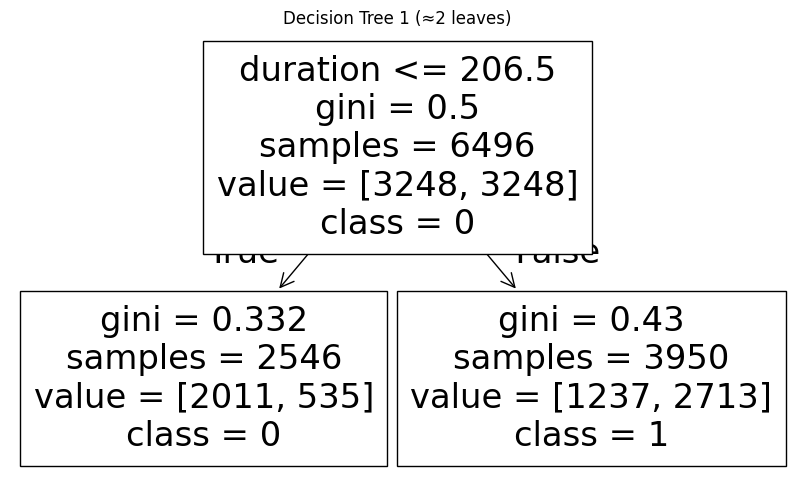

Root split: duration <= 206.5000
Majority class (train) = 1; baseline errors = 3248
Tree 1 train errors = 1772
Reduction vs baseline = 1476 fewer mistakes
\nConfusion Matrix (Tree 1 — Test):
[[ 840  552]
 [ 227 1165]]
\nClassification Report (Tree 1 — Test):
              precision    recall  f1-score   support

           0     0.7873    0.6034    0.6832      1392
           1     0.6785    0.8369    0.7494      1392

    accuracy                         0.7202      2784
   macro avg     0.7329    0.7202    0.7163      2784
weighted avg     0.7329    0.7202    0.7163      2784



In [18]:

# Choose alpha for approx. 2 leaves
alpha1, leaves1 = pick_alpha_for_leaves(X_train, y_train, desired_leaves=2, random_state=42)
tree1 = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha1)
tree1.fit(X_train, y_train)

print(f"Chosen ccp_alpha for Tree 1: {alpha1:.6f}; leaves obtained: {tree1.get_n_leaves()}")

# Plot
plt.figure()
plot_tree(tree1, feature_names=X_train.columns, class_names=[str(c) for c in sorted(pd.Series(y).unique())], filled=False)
plt.title("Decision Tree 1 (≈2 leaves)")
plt.show()

# Root split explanation
feature_names = X_train.columns.to_list()
root_feature_idx = tree1.tree_.feature[0]
root_threshold = tree1.tree_.threshold[0]
if root_feature_idx >= 0:
    root_feature = feature_names[root_feature_idx]
    print(f"Root split: {root_feature} <= {root_threshold:.4f}")
else:
    print("Tree has no split (single node).")

# Majority baseline errors (train)
vc = pd.Series(y_train).value_counts()
majority_class = vc.idxmax()
majority_baseline_errors = len(y_train) - vc.max()
print(f"Majority class (train) = {majority_class}; baseline errors = {majority_baseline_errors}")

# Tree misclassifications (train)
yhat1_train = tree1.predict(X_train)
errors_tree1_train = (yhat1_train != y_train).sum()
print(f"Tree 1 train errors = {errors_tree1_train}")
print(f"Reduction vs baseline = {majority_baseline_errors - errors_tree1_train} fewer mistakes")

# Predict & evaluate (test)
yhat1 = tree1.predict(X_test)
print("\\nConfusion Matrix (Tree 1 — Test):")
print(confusion_matrix(y_test, yhat1))
print("\\nClassification Report (Tree 1 — Test):")
print(classification_report(y_test, yhat1, digits=4))


# Chunk 5

Chosen ccp_alpha for Tree 2: 0.005083; leaves obtained: 8


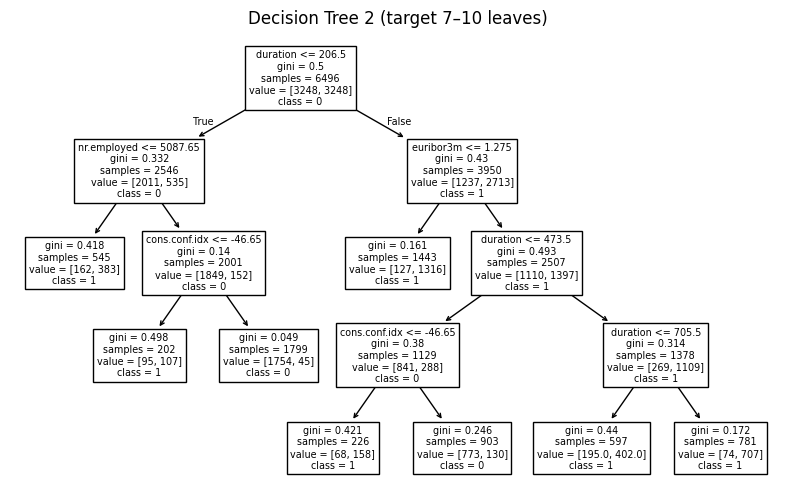

\nConfusion Matrix (Tree 2 — Test):
[[1076  316]
 [  74 1318]]
\nClassification Report (Tree 2 — Test):
              precision    recall  f1-score   support

           0     0.9357    0.7730    0.8466      1392
           1     0.8066    0.9468    0.8711      1392

    accuracy                         0.8599      2784
   macro avg     0.8711    0.8599    0.8588      2784
weighted avg     0.8711    0.8599    0.8588      2784



In [19]:

# Choose alpha for ~8 leaves
alpha2, leaves2 = pick_alpha_for_leaves(X_train, y_train, desired_leaves=8, random_state=42)
tree2 = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha2)
tree2.fit(X_train, y_train)

print(f"Chosen ccp_alpha for Tree 2: {alpha2:.6f}; leaves obtained: {tree2.get_n_leaves()}")

# Plot
plt.figure()
plot_tree(tree2, feature_names=X_train.columns, class_names=[str(c) for c in sorted(pd.Series(y).unique())], filled=False)
plt.title("Decision Tree 2 (target 7–10 leaves)")
plt.show()

# Predict & evaluate
yhat2 = tree2.predict(X_test)
print("\\nConfusion Matrix (Tree 2 — Test):")
print(confusion_matrix(y_test, yhat2))
print("\\nClassification Report (Tree 2 — Test):")
print(classification_report(y_test, yhat2, digits=4))


# Chunk 6

Removed duration column(s): ['duration']
Chosen ccp_alpha for Tree 3: 0.001921; leaves obtained: 8 (target ≈ 8)


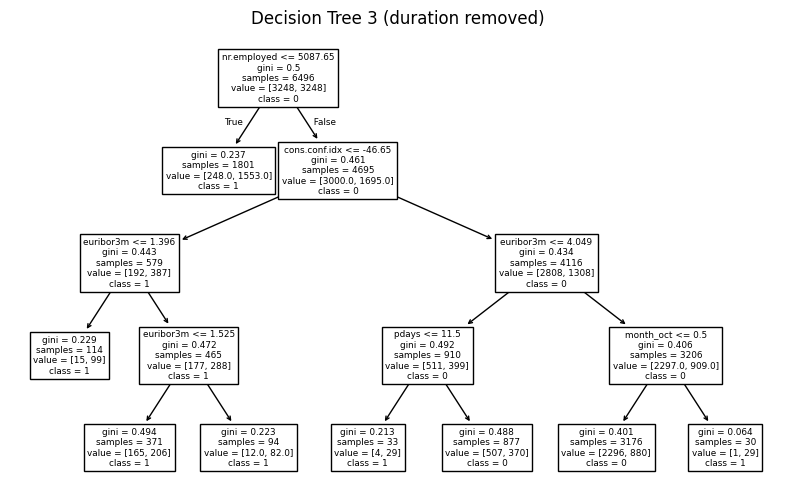

\nConfusion Matrix (Tree 3 — Test):
[[1209  183]
 [ 522  870]]
\nClassification Report (Tree 3 — Test):
              precision    recall  f1-score   support

           0     0.6984    0.8685    0.7743      1392
           1     0.8262    0.6250    0.7117      1392

    accuracy                         0.7468      2784
   macro avg     0.7623    0.7468    0.7430      2784
weighted avg     0.7623    0.7468    0.7430      2784



In [20]:

# Remove 'duration' (case-insensitive exact match) from predictors
duration_cols = [c for c in X.columns if c.lower() == 'duration']
if len(duration_cols) == 0:
    print("NOTE: No 'duration' column found (case-insensitive). If your dataset has it, ensure the column is named 'duration'.")
    X_no_dur = X.copy()
else:
    X_no_dur = X.drop(columns=duration_cols)
    print("Removed duration column(s):", duration_cols)

X_no_dur_oh = pd.get_dummies(X_no_dur, drop_first=False)

# Split
Xnd_train, Xnd_test, ynd_train, ynd_test = train_test_split(
    X_no_dur_oh, y, test_size=0.3, random_state=42, stratify=y
)

# Try to match Tree 2's leaf count
alpha3, leaves3 = pick_alpha_for_leaves(Xnd_train, ynd_train, desired_leaves=max(2, tree2.get_n_leaves()), random_state=42)
tree3 = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha3)
tree3.fit(Xnd_train, ynd_train)

print(f"Chosen ccp_alpha for Tree 3: {alpha3:.6f}; leaves obtained: {tree3.get_n_leaves()} (target ≈ {tree2.get_n_leaves()})")

# Plot
plt.figure()
plot_tree(tree3, feature_names=Xnd_train.columns, class_names=[str(c) for c in sorted(pd.Series(y).unique())], filled=False)
plt.title("Decision Tree 3 (duration removed)")
plt.show()

# Predict & evaluate
yhat3 = tree3.predict(Xnd_test)
print("\\nConfusion Matrix (Tree 3 — Test):")
print(confusion_matrix(ynd_test, yhat3))
print("\\nClassification Report (Tree 3 — Test):")
print(classification_report(ynd_test, yhat3, digits=4))

If metrics drop vs. Tree 2, that suggests 'duration' was an important feature.

## Task 7 — Describe and Compare

In [21]:

def acc_f1(y_true, y_pred):
    acc = metrics.accuracy_score(y_true, y_pred)
    f1  = metrics.f1_score(y_true, y_pred, average='binary')
    return acc, f1

acc1, f11 = acc_f1(y_test, yhat1)
acc2, f12 = acc_f1(y_test, yhat2)
acc3, f13 = acc_f1(ynd_test, yhat3)

summary = pd.DataFrame({
    "Model": ["Tree 1 (≈2 leaves)", f"Tree 2 ({tree2.get_n_leaves()} leaves)", f"Tree 3 no duration ({tree3.get_n_leaves()} leaves)"],
    "Accuracy": [acc1, acc2, acc3],
    "F1": [f11, f12, f13]
})
display(summary)


,Model,Accuracy,F1
0,Tree 1 (≈2 leaves),0.720187,0.749437
1,Tree 2 (8 leaves),0.859914,0.871117
2,Tree 3 no duration (8 leaves),0.746767,0.711656


I"ll round up to 2 digit. </br>
Tree 1 (≈2 leaves) shows the lowest performance (Acc=0.72, F1=0.75) because heavy pruning caused underfitting.</br>
Tree 2 (~8 leaves) performs best (Acc=0.86, F1=0.87) since moderate pruning let the model use more important features. </br>
Tree 3 (no duration) drops (Acc=0.75, F1=0.71) because removing duration removed a key predictor.